# Comparing data

Many times you sample data and want to test if they belong to a known population. Some other times, you want to compare them with each other.

Let me create two data set : `data1` and `data2` which comes from two different populations. First population has `Guassian` with mean 1.0 and variance 0.2; while the second population is uniform with mean 1.0 and same variance.

In [1]:
%matplotlib inline
import numpy as np
import pylab

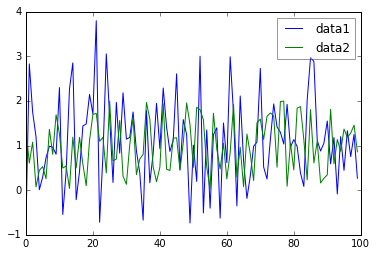

In [12]:
data1 = np.random.normal(1.0, 1.0, 100 )
data2 = np.random.uniform(0.0, 2.0, 100 )
pylab.plot(data1, label = 'data1')
pylab.plot( data2, label = 'data2')
pylab.legend( framealpha = 0.4 )

(array([ 0.50888898,  0.45800008,  0.96688907,  0.25444449,  0.30533339,
         0.86511127,  0.30533339,  0.35622229,  0.40711119,  0.66155568]),
 array([ 0.03153368,  0.2280402 ,  0.42454671,  0.62105322,  0.81755974,
         1.01406625,  1.21057277,  1.40707928,  1.60358579,  1.80009231,
         1.99659882]),
 <a list of 10 Patch objects>)

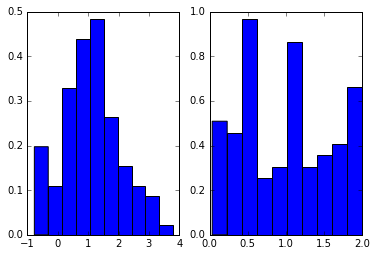

In [13]:
pylab.subplot( 1, 2, 1)
pylab.hist( data1, normed = True )
pylab.subplot( 1, 2, 2)
pylab.hist( data2, normed = True )

Well there is some suggestions that they are different. We can plot `boxplot` to summarise the difference.

{'boxes': [<matplotlib.lines.Line2D at 0x7f7fd3052750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7fd2fe0650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7fd2fec950>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7fd2fec310>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7fd3052910>,
  <matplotlib.lines.Line2D at 0x7f7fd2ff9c10>]}

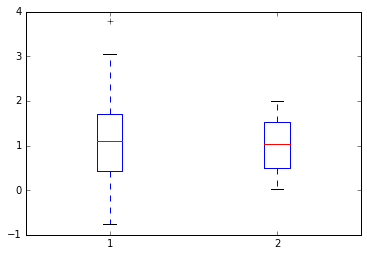

In [18]:
pylab.boxplot( [ data1, data2 ], label) # plot boxplots side by side.

# t-test 

t-test is the standard test to compare the give samples. Library __scipy.stats__ has inbuilt support for performing t-test.

For the purpose of demo, we are comparing `data1` and `data2`.

In [20]:
import scipy.stats
t, p = scipy.stats.ttest_ind( data1, data2 )
print( 'P value is %f' % p )

P value is 0.265000


Let's see how the `p-value` scales when we add a 'bias' in the same data.

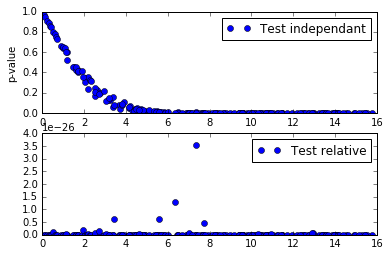

In [58]:
bias, test_ind, test_rel = [], [], []
for i in range( 200 ):
    std, N = 15, 100
    b = np.random.uniform(0.0, i * std / 100.0, N )
    data1 = np.random.normal( 50.0, std, N )
    data2 = data1 + b
    t, p = scipy.stats.ttest_ind( data1, data2 ) # independent samples have identical average (expected) values
    test_ind.append( p )
    t, p = scipy.stats.ttest_rel( data1, data2 ) # related or repeated samples have identical average (expected) values
    test_rel.append( p )
    bias.append( np.mean(b) )
   
pylab.subplot( 2, 1, 1)
pylab.plot( bias, test_ind, 'o', label = 'Test independant' )
pylab.xlabel( 'bias - % of std')
pylab.ylabel( 'p-value')
pylab.legend()
pylab.subplot( 2, 1, 2)
pylab.plot( bias, test_rel, 'o', label = 'Test relative')
pylab.legend()